In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits
from keckcode_test.keckcode.esiredux import esi2d, esi1d
from specim_test.specim.specfuncs import spec2d, spec1d, echelle1d
from scipy.ndimage import shift

In [2]:
file_loc = '../galaxy_spectra/ESI_data/2019_01/*'

In [3]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'B0445' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)

In [4]:
spec2d_file_list, var2d_file_list

(['../galaxy_spectra/ESI_data/2019_01/B0445+123_0044_bgsub.fits',
  '../galaxy_spectra/ESI_data/2019_01/B0445+123_0045_bgsub.fits',
  '../galaxy_spectra/ESI_data/2019_01/B0445+123_0043_bgsub.fits'],
 ['../galaxy_spectra/ESI_data/2019_01/B0445+123_0043_var.fits',
  '../galaxy_spectra/ESI_data/2019_01/B0445+123_0045_var.fits',
  '../galaxy_spectra/ESI_data/2019_01/B0445+123_0044_var.fits'])

In [5]:
spec1 = esi2d.Esi2d(spec2d_file_list[2], varfile=var2d_file_list[0])
spec2 = esi2d.Esi2d(spec2d_file_list[0], varfile=var2d_file_list[2])
spec3 = esi2d.Esi2d(spec2d_file_list[1], varfile=var2d_file_list[1])

Order  Shape    Dispaxis
----- --------- --------
  1   3460x164     x
  2   4093x155     x
  3   4096x145     x
  4   4096x140     x
  5   4096x134     x
  6   4096x129     x
  7   4096x125     x
  8   4096x121     x
  9   4096x117     x
 10   4096x116     x
Order  Shape    Dispaxis
----- --------- --------
  1   3460x164     x
  2   4093x155     x
  3   4096x145     x
  4   4096x140     x
  5   4096x134     x
  6   4096x129     x
  7   4096x125     x
  8   4096x121     x
  9   4096x117     x
 10   4096x116     x
Order  Shape    Dispaxis
----- --------- --------
  1   3460x164     x
  2   4093x155     x
  3   4096x145     x
  4   4096x140     x
  5   4096x134     x
  6   4096x129     x
  7   4096x125     x
  8   4096x121     x
  9   4096x117     x
 10   4096x116     x


Order_06 pixscale: 0.149
Profile max value (before normalization) 2.110152


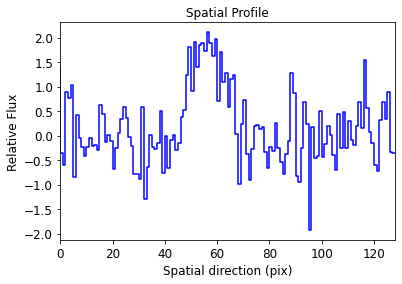

Profile max value (before normalization) 3.621475


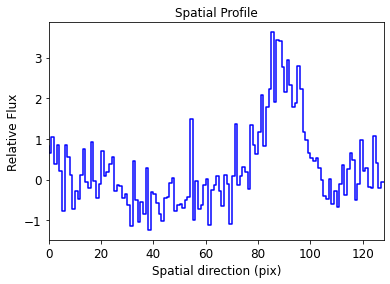

Profile max value (before normalization) 2.660624


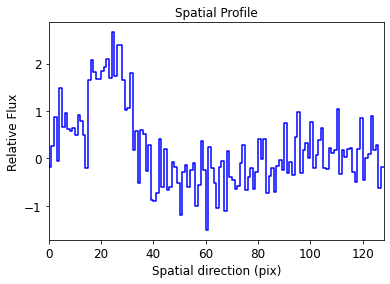

Order_07 pixscale: 0.153
Profile max value (before normalization) 5.400393


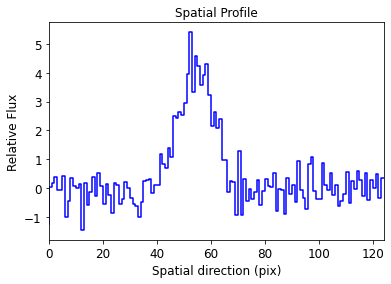

Profile max value (before normalization) 5.289093


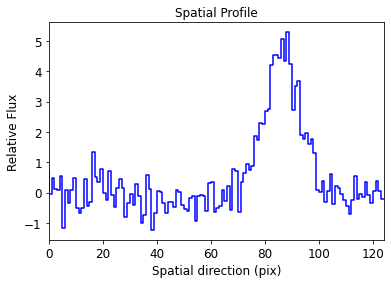

Profile max value (before normalization) 5.113031


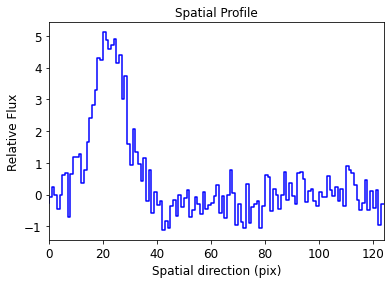

Order_08 pixscale: 0.158
Profile max value (before normalization) 7.730708


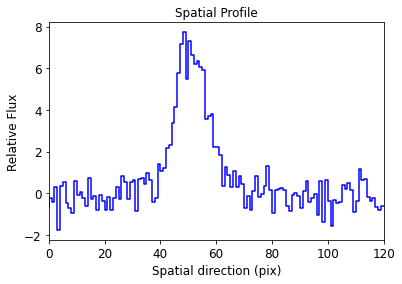

Profile max value (before normalization) 7.138399


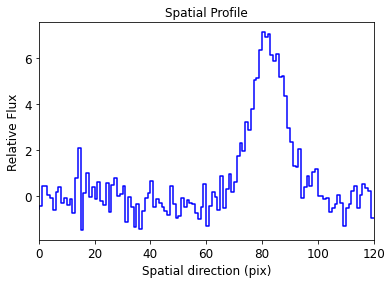

Profile max value (before normalization) 7.212111


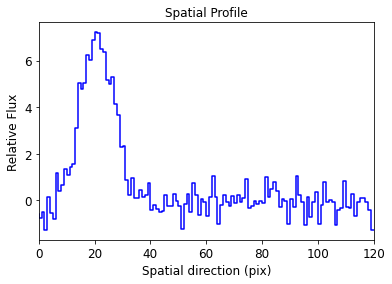

Order_09 pixscale: 0.163
Profile max value (before normalization) 10.566136


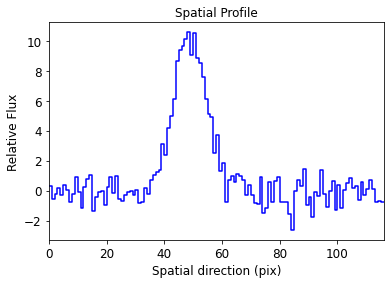

Profile max value (before normalization) 11.648529


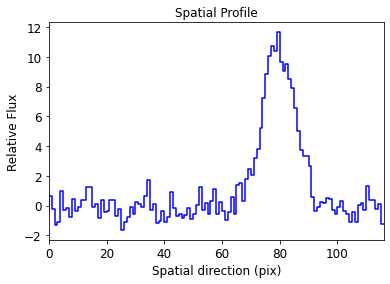

Profile max value (before normalization) 12.251335


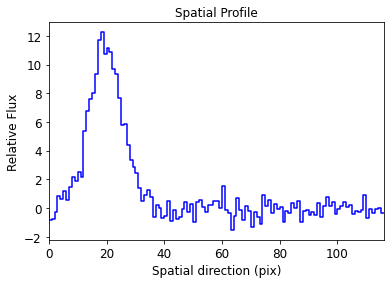

Order_10 pixscale: 0.168
Profile max value (before normalization) 3.654104


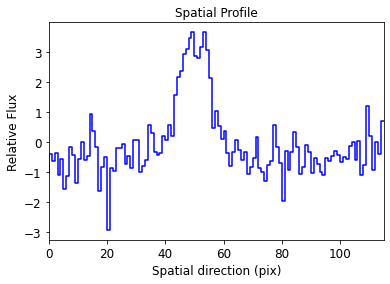

Profile max value (before normalization) 3.205493


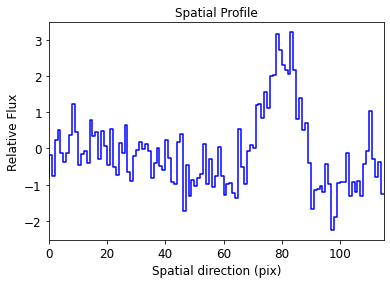

Profile max value (before normalization) 3.583167


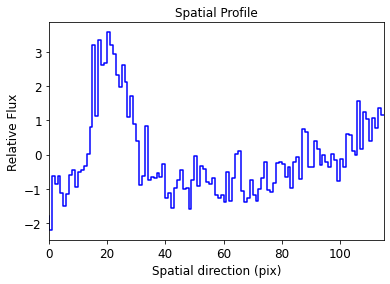

In [10]:
pixrange = [[2600, 3000],[3000, 3400], [1700, 2100], [1900, 2300], [650, 950]] 
spec_list = [spec1, spec2, spec3]
order_list = spec1.ordinfo

for order, pix in zip(order_list[5:], pixrange):
    print(order['name'], 'pixscale:', order['pixscale'])
    for sp in spec_list:
        profile = sp[order['order']-1].spatial_profile(pixrange=pix)
        plt.show()
        #sp[order['order']-1].initial_model()